<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/02_Qiskit_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Qiskit 시작하기

In [ ]:
!python3 -m pip install qiskit[visualization]

In [ ]:
import numpy as mp
from qiskit import *

**회로기초**

회로만들기

In [ ]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

**GHZ 상태**

In physics, in the area of quantum information theory, a Greenberger–Horne–Zeilinger state (GHZ state) is a certain type of entangled quantum state that involves at least three subsystems (particle states, qubits, or qudits). It was first studied by Daniel Greenberger, Michael Horne and Anton Zeilinger in 1989.[1] Extremely non-classical properties of the state have been observed.

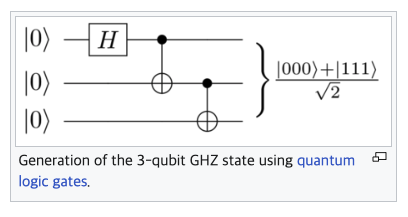

**GHZ(Greenberger-Horne-Zeilinger) 상태**는 양자 컴퓨팅에서 중요한 개념 중 하나입니다. GHZ 상태란, 3개 이상의 양자 비트(큐비트)가 서로 물리적으로 얽혀(Entangled) 있을 때 나타나는 상태를 말합니다.

GHZ 상태는 다음과 같은 특징을 가지고 있습니다.

양자적 상호 연관성 : GHZ 상태는 양자적으로 상호 연관된 비트들의 집합이므로, 이들은 서로 결합되어 있습니다.

1. 높은 병렬성 : GHZ 상태는 여러 개의 양자 비트를 동시에 다룰 수 있기 때문에, 병렬 처리에 대한 높은 효율성을 제공합니다.

2. 빠른 정보처리 속도 : GHZ 상태를 이용하면 빠른 정보 처리 속도를 얻을 수 있습니다.

3. GHZ 상태는 양자 알고리즘에서 중요한 역할을 합니다. 예를 들어, GHZ 상태를 이용하면 병렬 양자 계산을 수행할 수 있으며, 이는 일반적인 컴퓨팅에서의 병렬 처리와는 전혀 다른 방식으로 이루어집니다. GHZ 상태를 이용한 양자 알고리즘에는 양자 텔레포트, 양자 침입 검출 등이 있습니다.

또한, GHZ 상태는 양자 보안 분야에서도 사용됩니다. 예를 들어, GHZ 상태를 이용하여 양자 보안 키 분배(QKD) 프로토콜을 구현할 수 있습니다.

따라서, GHZ 상태는 양자 컴퓨팅에서 매우 중요한 개념이며, 양자 알고리즘과 양자 보안 분야에서 활용되고 있습니다.

In [ ]:
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{2}$, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

회로 시각화하기

In [ ]:
circ.draw('mpl')

**Qiskit Aer 를 사용하여 회로 시뮬레이션 하기**

상태 벡터 백엔드

In [ ]:
# inport Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simlator backend
backend = Aer.get_backend('statevector_simulator')

In [ ]:
# Create a Quantum Program for execution
job = backend.run(circ)

프로그램을 실행할 때, 작업 객체는 다음의 두 메소드 job.status() 와 job.result() 를 가지는데, 각각은 작업의 대한 상태와 그 결과를 돌려준다.

In [ ]:
result = job.result()

In [ ]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

In [ ]:
# 밀도매트릭스의 실수와 허수를 보여주는 시각화
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

유니터리 백엔드

In [ ]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circ)
result = job.result()

# Show the results
print(result.get_unitary(experiment=circ, decimals=3))

**OpenQASM 후위 처리 장치**

In [ ]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))

# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using the compose method
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

#drawing the circuit
qc.draw()

In [ ]:
# User Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(qc, backend_sim), shot=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [ ]:
counts = result_sim.get_counts(qc)
print(counts)

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright